This practical work, on motion estimation, has 3 different parts, corresponding to three families of algorithms that we have seen in class:
- Block matching algorithms
- Optic flow
- Parametric motion estimation.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

Student: Luiz Augusto Facury de Souza

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from me_ssd import me_ssd
from displayMVF import displayMVF
from fracMc import fracMc
from PSNR import PSNR
from me_sad import me_sad
from HornSchunck import HS
from applyAffineMotion import applyAffineMotion
from angle2D import angle2D
from gradient import gradient

# I - Block matching algorithms
## I-1 - Unregularized algorithms
### I-1-a - Unregularized SSD-based algorithm

First, read the two images 'flower_cif_1.mat' and 'flower_cif_1.mat', which are two consecutive frames of a video sequence. You will have to estimate the motion between these frame, using block matching algorithms.

In [3]:
im1 = loadmat('flower_cif_1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('flower_cif_2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7efc8ec936d0>)

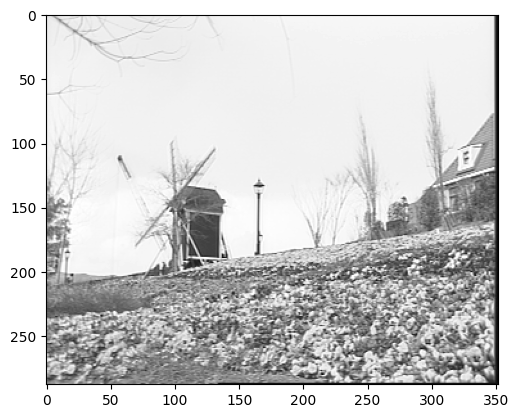

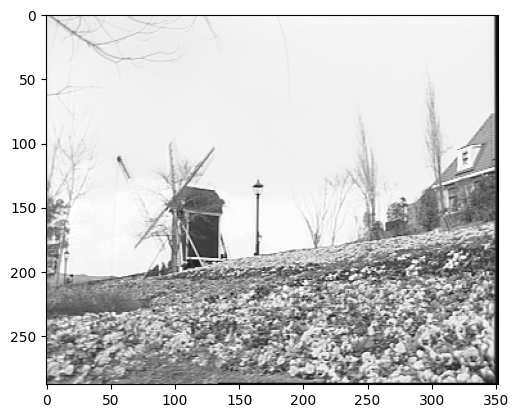

In [4]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

First, you will have to encode a block matching using the SSD criterion. Some default values of the algorithm are given below: the number of column and rows in each block, and the search radius.

In [5]:
brow = 16 # Number of rows per block
bcol = 16 # Number of columns per block
search_radius = 8 # Search radius

Code the me_ssd function in the me_ssd file. First, implement the unregularized function.

In [6]:
from me_ssd import me_ssd
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Write your remarks. Are there errors? If yes, where and why?

Change the block size and the search area radius. How does it impact your results?

* We can see that there are erros in homogeneous areas, such as the sky. This is due to the fact that those areas do not change between the two frames, that is the algorithm ignores of the distance between the 2 blocks, and only take into account the difference of the intensities.

* When we increase the block size, the probability of finding a distant block with less dissimilarity in comparison to the neighborhood increases, since the number of errors in motion vectors is reduced. However, increasing the area radius increases the probability of finding more blocks with less dissimilarity, so the number of errors in motion vectors increases.

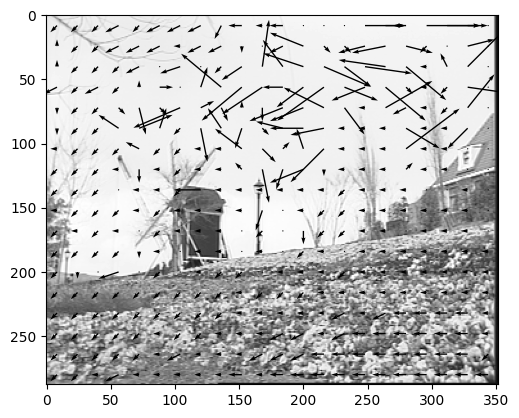

In [7]:
from displayMVF import displayMVF
displayMVF(im1,mvf_ssd,brow)

Motion compensation: now that we have computed the movement vector field, we can compute the motion compensated image. Display the motion compensated image. What can you observe ?

TO DO : code the motion compensation function

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7efc8c1f0b50>)

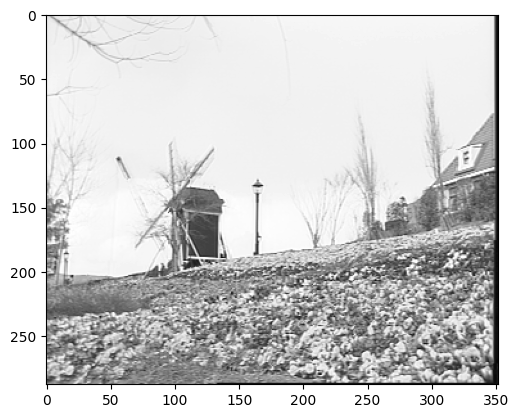

In [8]:
from fracMc import fracMc
mc_ssd = fracMc(im1,mvf_ssd)
plt.figure(),plt.imshow(mc_ssd,cmap='gray')

Compute the PSNR between the motion compensated and the current images.

What is the definition of PSNR ? Is the PSNR between the motion-compensated image and im2 better than between im1 and im2 ? Explain why.

Code the PSNR function. Compute it using the BM algorithm results, with different parameter values. Explain what you observe.

* The Peak Signal-to-Noise Ratio (PSNR) is a measure of the quality of an image, the higher the PSNR, the better the quality of the image. The ratio is defined as:
$$PSNR = 10 \log_{10} \left(\frac{max^2}{MSE}\right)$$
where $MSE$ is the mean squared error between the two images.

In [9]:
from PSNR import PSNR
psnr_ssd = PSNR(im2,mc_ssd)
print(psnr_ssd)

22.706093367942778


In [10]:
print(PSNR(im2,im1))

18.786509322935075


* We can see that the PSNR between im1 and im2 is lower than the PSNR between the motion-compensated image and im2. This is because the motion-compensated image is a better approximation of im2 than im1 is.

### I-1-b Unregularized SAD-based algorithm
Now, we will use the SAD as a metric for the block matching algorithm. To do that, implement the me_sad algorithm. Please note that you function should be very similar to me_ssd, except for the metric (as such, as a starting point, you can copy paste what you have proposed for me_ssd).

In [11]:
from me_sad import me_sad
mvf_sad,prediction =  me_sad(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Do you see any difference with the SSD ? Explain.

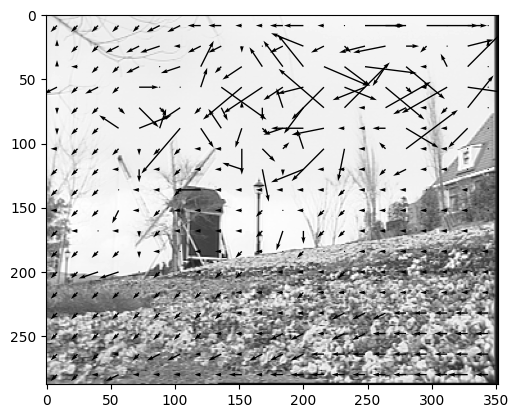

In [12]:
displayMVF(im1,mvf_sad,brow)

Motion compensation: compute the motion compensated image and display it. In addition, compute the PSNR.

Comment the difference observed between SSD and SAD in terms of regularity of the motion vector field, PSNR of the prediction and impact of the block size.

* We can see that the PSNR is almost equal, although the SAD is a little bit lower. Besides, we can see that the SSD dissimilarity gives a smoother result than the SAD, and the block size has a greater impact on the SAD than on the SSD, since the SAD is more sensitive to the intensity of the pixels.

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7efc8c131c30>)

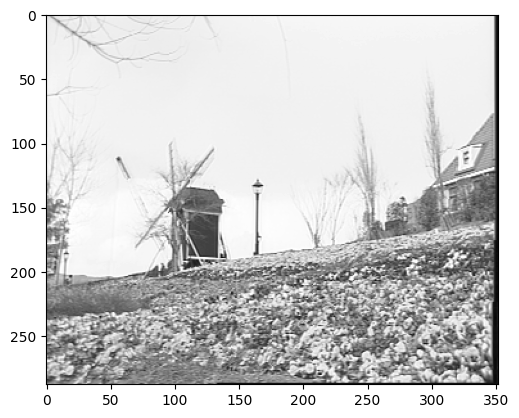

In [13]:
mc_sad = fracMc(im1,mvf_sad)
plt.figure(),plt.imshow(mc_sad,cmap='gray')

In [14]:
psnr_sad = PSNR(im2,mc_sad)
print(psnr_sad)

22.624558403978142


## I-2- Regularized algorithms
Now, we will add a regularization term to the metrics (SSD and then SAD) we previously used.
### I-2-1- Regularized SSD-based algorithm

TO DO : code the regularized SSD-based algorithm.
For the sake of simplicity, the regularizing function is already given. How does it work and what does it compute?

Try several parameter values, and compare your results with the unregularized algorithms. What can you observe?

* The function minimizes the SSD metric between the 2 blocks with a regularization term that represents the displacement or the distance between the 2 blocks, in a way that the distance between the 2 blocks is penalized.

* We can notice that the motion vector is small through the image, and there is no error. When we change the value of lambda, however, the PSNR decreases a little bit, the highest PSNR is with lambda = 0, although the difference is not very significant.

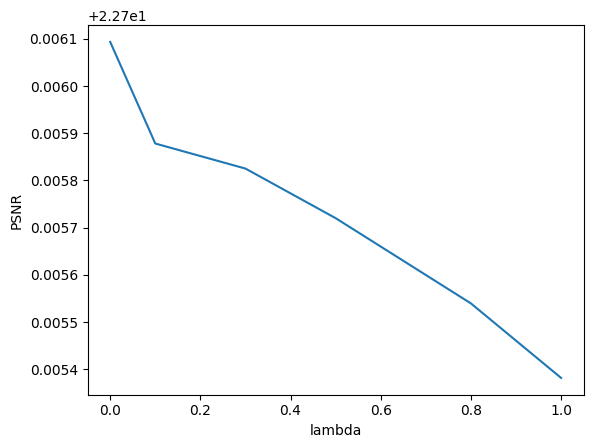

Best PSNR = 22.706093367942778 for lambda = 0


In [15]:
psnrs = []
for lamb in [0, 0.1, 0.3, 0.5, 0.8, 1.0]:
    mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius, lamb)
    mc_ssd = fracMc(im1,mvf_ssd)
    psnrs.append(PSNR(im2, mc_ssd))

plt.figure()
plt.plot([0,0.1, 0.3, 0.5, 0.8, 1.0], psnrs)
plt.xlabel('lambda')
plt.ylabel('PSNR')
plt.show()

print('Best PSNR = ' + str(max(psnrs)) + ' for lambda = ' + str([0,0.1, 0.3, 0.5, 0.8, 1.0][np.argmax(psnrs)]))



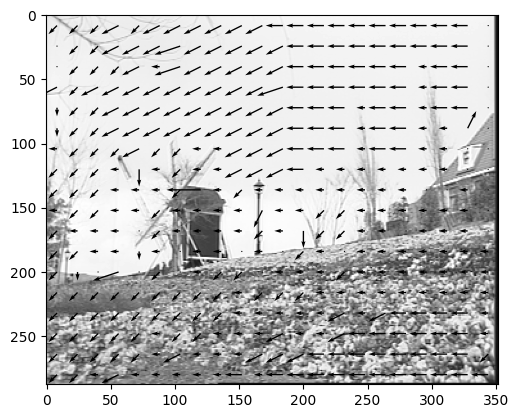

In [16]:
#for lambda = 1
displayMVF(im1,mvf_ssd,brow)

### I-2-2- Regularized SAD-based algorithm

TO DO : code the regularized SAD-based algorithm.

Try several parameter values, and compare your results with the unregularized algorithms and the regularized SSD-based algorithm.

* We can notice the same thing with the SSD algorithm, the motion vector is small through the image, and there is no error. The PSNR also decreases when we increase lambda, and the best value is lambda = 0.

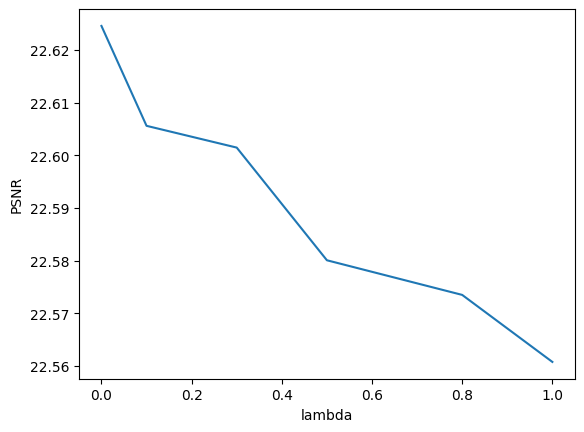

Best PSNR = 22.624558403978142 for lambda = 0


In [17]:
psnrs = []
for lamb in [0, 0.1, 0.3, 0.5, 0.8, 1.0]:
    mvf_sad,prediction =  me_sad(im2, im1, brow, bcol, search_radius, lamb)
    mc_sad = fracMc(im1,mvf_sad)
    psnrs.append(PSNR(im2, mc_sad))

plt.figure()
plt.plot([0,0.1, 0.3, 0.5, 0.8, 1.0], psnrs)
plt.xlabel('lambda')
plt.ylabel('PSNR')
plt.show()

print('Best PSNR = ' + str(max(psnrs)) + ' for lambda = ' + str([0,0.1, 0.3, 0.5, 0.8, 1.0][np.argmax(psnrs)]))



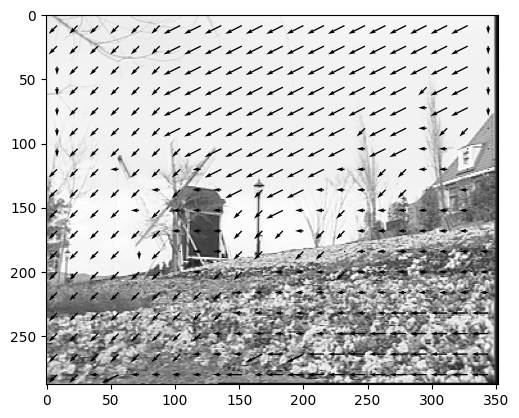

In [18]:
#for lambda=1
displayMVF(im1,mvf_sad,brow)

# Optical flow

You will now implement the Horn and Schunck algorithm to estimate the optic flow. The two images we will consider here have a more local movement vector field, since we are considering small movements in a face.

In [19]:
im1 = loadmat('akiyo_cif1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('akiyo_cif2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7efc86d58c70>)

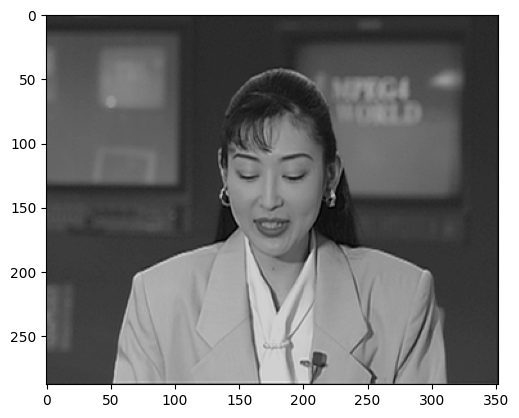

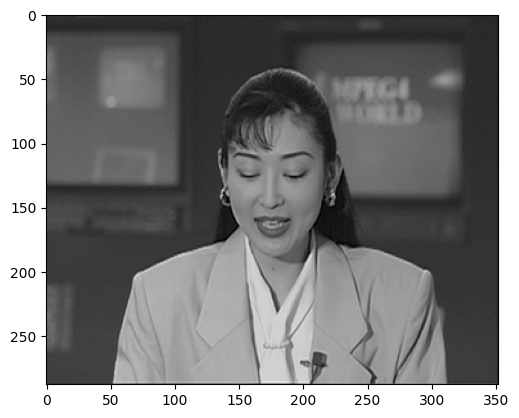

In [20]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the optical flow by filling the gaps in the Horn and Schunck function. You can use the motion field that you estimated before with the block matching algorithms to initialize you algorithm.

As a reminder, the optical flow is implemented by the iterative Horn and Schunck's algorithm:
$$
u^{n+1} = \bar{u}^n - f_x \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
$$
v^{n+1} = \bar{v}^n - f_y \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
where $u^n$ is the value of the $u$ component at the $n$-th iteration, and $\bar{u}$ is the local average of $u$.

In [21]:
from HornSchunck import HS
brow = 16; bcol=16; search_radius =13;

alpha = 100
ite = 100

uInitial = np.zeros(im2.shape) # Rem: pay attention to the inversion of the order compare to me_ssd.
vInitial = np.zeros(im2.shape)
[u, v] = HS(im2, im1, uInitial, vInitial, alpha, ite,blur=1.)

Display the motion field and compute the PSNR. Do you observe any improvement compare to block-matching algorithms? Explain. You can test on both the Akiyo and Flowers images.

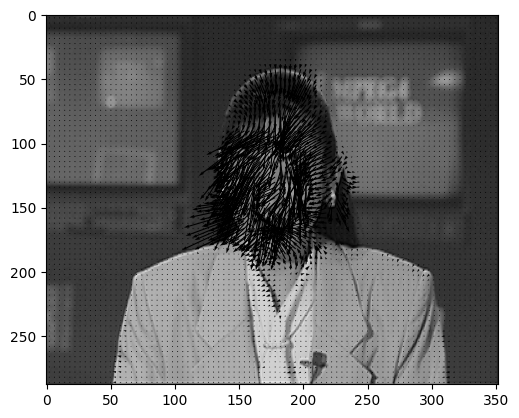

In [22]:
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)

mc_hs = fracMc(im1,mvf_hs)
psnr_hs = PSNR(im2,mc_hs)

In [23]:
psnr_hs

33.55419950517836

* We can see that the PSNR is a little bit higher than the one obtained with the block-matching algorithms, but the difference is not very significant.

## End of TP 1

# III - Parametric estimation
In this last part, we will work on parametric estimation, both using direct and indirect methods.
## III-1- Direct parametric estimation
### III-1-1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

Recall the expression of the 2D discrete time Fourier transform (DTFT).

Let us suppose that
$\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2,b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). Compute the DTFT of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

Show that the ratio between the DTFTs is:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

Recall the expression of the DF.

Under which hypotheses is the ratio between $a$'s and $b$'s DFT a linear phase signal:
$$
\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)
$$

Using $b(n,m)$ as a translation of a bi-dimensional signal $a(n,m)$ by $(c,d)$, that is, $b(n,m) = a(n+c,m+d)$ for all $n,m \in \mathbb{Z}^2$, then the DTFT of $b$ can be expressed as the DTFT of $a$ multiplied by a complex exponential factor $e^{i2\pi(c\nu_x+d\nu_y)}$, where $\nu_x$ and $\nu_y$ are the frequency variables in the DTFT. In other words,

That is:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

where $\hat{a}$ and $\hat{b}$ are the 2D DTFTs of $a$ and $b$, respectively.

If we have two finite signals $a$ and $b$, both defined on a $N \times N$ grid, than the ratio between their Discrete Fourier Transforms (DFTs) is a linear phase signal if and only if $b$ is a translated version of $a$ by an int in both $x$ and $y$ directions. Therefore, the ratio is given by $$\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)$$
Where $(c,d)$ is the translation amount and $\hat{A}$ and $\hat{B}$ are the DFTs of $a$ and $b$, respectively.

### III-1-2 Practical part
First, start to work on the 'ball.mat' image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding of not some noise into the image.

In [24]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7efc86f7a350>)

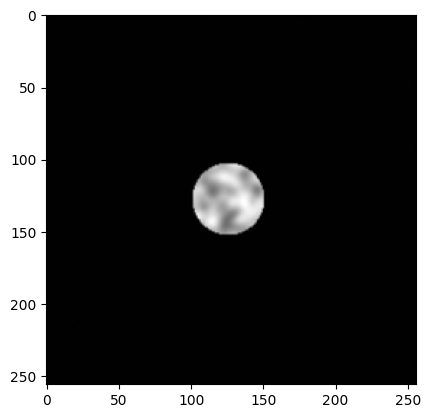

In [25]:
# Potentially add noise to the image
sigma = 0.3
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray')

In the following, we apply a translation to the image.

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7efc86e455d0>)

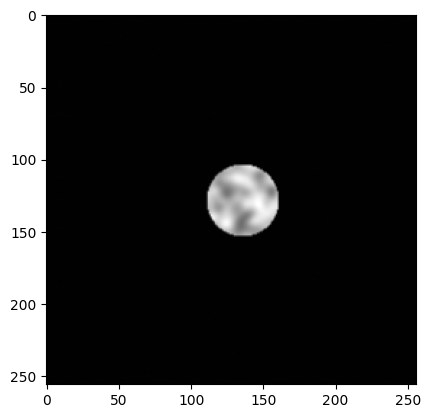

In [26]:
from applyAffineMotion import applyAffineMotion
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs.

In order to find the parameters of the translation, we can use the given equation:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$
Where $\hat{a}$ and $\hat{b}$ are the 2D DTFTs of $a$ and $b$, respectively.

We can then compute the ratio between the two FFTs, and find the parameters of the translation by computing the inverse Fourier transform of the ratio.



In [27]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

In [28]:
from angle2D import angle2D
phi = angle2D(IM1/IM2)

Display phi. Is it a linear plane and why?

Phi is a linear phase signal because it is a translation of the image by $(c,d)$, where $c$ and $d$ are integers.

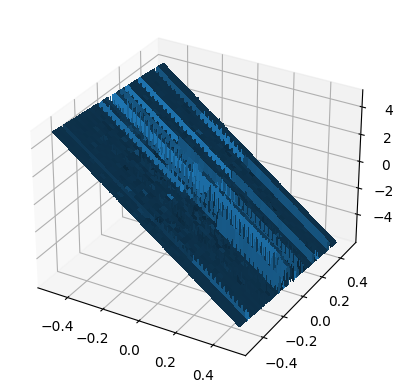

In [29]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)

Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [30]:
from gradient import gradient
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

In [31]:
print(GX)
print(GY)

-9.999192628249318
-0.9981809005876698


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

The least Square planar approximatino of phi works by computing the gradient of phi, and then computing the least square planar approximation of the gradient. The parameters of the translation are, this way, the slope of the plane.

In [32]:
from scipy.ndimage.filters import median_filter as medianFilter
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)

/tmp/ipykernel_14487/3075517531.py:1: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter as medianFilter


In [33]:
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [34]:
print(bEst)

[-9.77923207 -1.00209874]


Relaunch the above code:
- with and without noise
- with the lena image, instead of the ball image.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

* It is difficult to correctly estimate the translation when there is noise in the image, because the gradient of the image is not very clear. We can see that the estimated translation is not very accurate in some cases.

In [35]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')
sigma = 1
im1_noise = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
N, M = np.shape(im1)


In [36]:
im2 = applyAffineMotion(im1,b)
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)
phi = angle2D(IM1/IM2)
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

print(GX)
print(GY)


-3.7199137450224917
-6.35828990447086


In [37]:
im2_noise = applyAffineMotion(im1_noise,b)
IM1 = np.fft.fft2(im1_noise)
IM2 = np.fft.fft2(im2_noise)
phi = angle2D(IM1/IM2)
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

print(GX)
print(GY)


-3.486466182790309
-6.124037128427521


# III-2-Indirect parametric estimation
In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

5.0
5.0


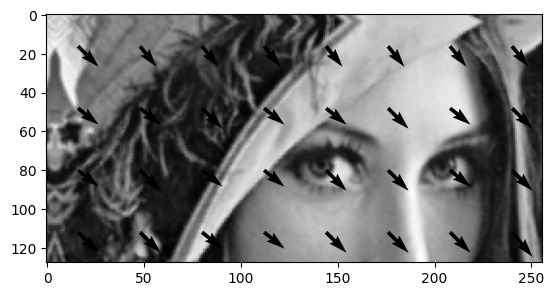

In [38]:
lamb = 0
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

Estimation with optic flow

1.7774942208868834
2.9998061017157513


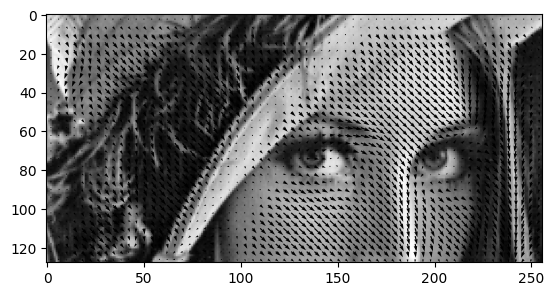

In [39]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)

In [40]:
# estimate the translation by taking the median of the estimated vector field.
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)


5.0
5.0


In [50]:
sigma = 2
im1_noise = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
im2_noise = applyAffineMotion(im1_noise,b)

5.0
5.0


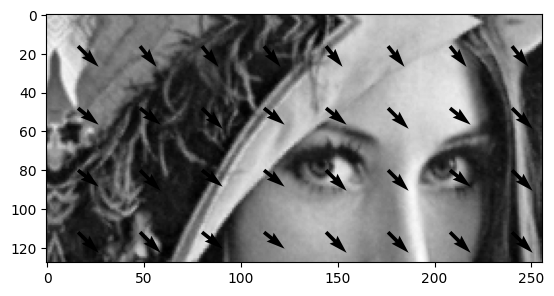

In [51]:
lamb = 0
mvf,prediction = me_ssd(im2_noise,im1_noise,32,32,10,lamb)
displayMVF(im2_noise,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

1.7785150576525988
2.9821170029661936


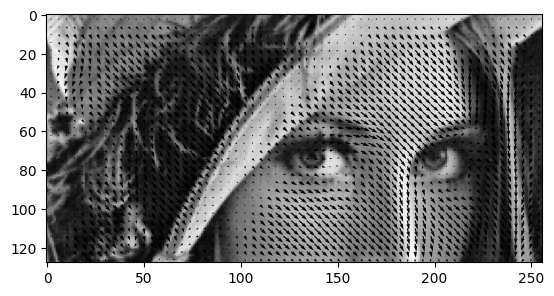

In [52]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2_noise, im1_noise, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1_noise,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)